# Analysis of the polarity results: graphical


This notebook contains the scripts to visualize the polarity analysis results:
- number of positive, negative and neutral tweets about all contraceptive classes per year:
    - raw numbers 
    - adjusted for total number of tweets about all contraceptive classes per year
- number of positive, negative and neutral tweets about LARC methods (IUD, LNG-IUD, Copper IUD, Implant) per year:
    - raw numbers 
    - adjusted for total number of tweets about LARC methods per year
- number of positive, negative and neutral tweets about non-LARC methods (Pill, Patch, Ring, Shot) per year: 
    - raw numbers
    - adjusted for total number of tweets about non-LARC methods per year
- number of positive, negative and neutral tweets about each contraceptive class per year: 
    - raw numbers
    - adjusted for total number of tweets about each contraceptive class per year


In [27]:
#####################
# Load Libraries    #
#####################
install.packages("ggplot2")
install.packages("dplyr")
library("ggplot2")
library("dplyr")
library("ggstatsplot")

rm(list=ls())
getwd()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library("ggstatsplot"): there is no package called ‘ggstatsplot’


In [28]:
fileListClean <- list.files("/home/ec2-user/SageMaker/CleanAndAggregateTweets/")
categories <-  c("copperIUD", "Implant", "IUD", "LNG-IUD", "Patch", "Ring", "Shot", "Pill")

In [29]:
for( i in 1:length(categories ) ){
    
    if( i ==1 ){
        polarityInput  <- read.delim( paste0( '/home/ec2-user/SageMaker/CleanAndAggregateTweets/', categories[i], "_CleanTweets.txt"), header = TRUE)
        polarityInput  <- polarityInput[, c("text", "date")]
        polarityInput$year <- sapply(strsplit( as.character(polarityInput$date), "-"), '[', 1)
        polarityInput$yearMonth <- paste0( sapply(strsplit( as.character(polarityInput$date), "-"), '[', 1), "-",
                                       sapply(strsplit( as.character(polarityInput$date), "-"), '[', 2) )
        colnames(polarityInput)[1] <- "tweets"
    
        polarityOutput <- read.csv( paste0( '/home/ec2-user/SageMaker/AWScomprenhend_output/', categories[i], "_AWScomprehend.csv"), header = TRUE)
   
        final <- inner_join( polarityOutput, polarityInput, by="tweets")
        
        selection <- final[ final$positive >= 0.95 | final$negative >= 0.95 | 
                                     final$neutral >= 0.95, c("sentiments", "year")] 
        selection$category <- categories[i]
    
    }else{
        polarityInputInt  <- read.delim( paste0( '/home/ec2-user/SageMaker/CleanAndAggregateTweets/', categories[i], "_CleanTweets.txt"), header = TRUE)
        polarityInputInt  <- polarityInputInt[, c("text", "date")]
        polarityInputInt$year <- sapply(strsplit( as.character(polarityInputInt$date), "-"), '[', 1)
        polarityInputInt$yearMonth <- paste0( sapply(strsplit( as.character(polarityInputInt$date), "-"), '[', 1), "-",
                                       sapply(strsplit( as.character(polarityInputInt$date), "-"), '[', 2) )
        colnames(polarityInputInt)[1] <- "tweets"
    
        polarityOutputInt <- read.csv( paste0( '/home/ec2-user/SageMaker/AWScomprenhend_output/', categories[i], "_AWScomprehend.csv"), header = TRUE)
        finalInt <- inner_join( polarityOutputInt, polarityInputInt, by="tweets")

        selectionInt <- finalInt[ finalInt$positive >= 0.95 | finalInt$negative >= 0.95 | 
                                     finalInt$neutral >= 0.95, c("sentiments", "year")] 
        selectionInt$category <- categories[i]
        
        selection <- rbind( selection, selectionInt)

        
    }
}

In [78]:
########################################
## Function to create adjusted barplot #
########################################
adjustedBarplot <- function( input, title ){
    ggplot(input, aes(x=as.factor(year), fill=as.factor(sentiments)))+
    geom_bar(aes( y=..count../tapply(..count.., ..x.. ,sum)[..x..]), position="stack" ) +
    scale_y_continuous(labels = scales::percent)+
    scale_fill_manual(values = c("orangered", "azure3", "springgreen3")) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "% of Tweets about contraception class")
}

In [33]:
#############################################
## Function to create non-adjusted barplot, stacked #
############################################
nonAdjustedBarplotStacked <- function( input, title ){
    ggplot(input, aes(x=as.factor(year), fill=as.factor(sentiments)))+
    geom_bar( position="stacked" ) + 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")
} 

In [48]:
#############################################
## Function to create non-adjusted barplot, un-stacked #
############################################
nonAdjustedBarplot <- function( input, title ){
    ggplot(input, aes(x=as.factor(year), fill=as.factor(sentiments)))+
    geom_bar(position="dodge")+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")
} 

In [27]:
########################################################################################
## Function to create non-adjusted barplot with consistent y axis for LARC vs. Non-LARC, stacked #
########################################################################################
nonAdjustedBarplot2Stacked <- function( input, title ){
    ggplot(input, aes(x=as.factor(year), fill=as.factor(sentiments)))+
    geom_bar( position="stack" ) + 
    scale_y_continuous(limits=c(0,30000)) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")
} 

In [50]:
########################################################################################
## Function to create non-adjusted barplot with consistent y axis for LARC vs. Non-LARC, un-stacked #
########################################################################################
nonAdjustedBarplot2 <- function( input, title ){
    ggplot(input, aes(x=as.factor(year), fill=as.factor(sentiments)))+ 
    scale_y_continuous(limits=c(0,30000)) +
    geom_bar(position="dodge")+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")
} 

In [55]:
#########################################################################################
## Function to create non-adjusted barplot with consistent y axis for individual methods, stacked #
#########################################################################################
nonAdjustedBarplot3Stacked <- function( input, title ){
    ggplot(input, aes(x=as.factor(year), fill=as.factor(sentiments)))+
    scale_y_continuous(limits=c(0,15000)) +
    geom_bar( position="stack" ) + 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")
} 

In [89]:
#########################################################################################
## Function to create non-adjusted barplot with consistent y axis for individual methods, un-stacked #
#########################################################################################
nonAdjustedBarplot3 <- function( input, title ){
    ggplot(input, aes(x=as.factor(year), fill=as.factor(sentiments)))+
    scale_y_continuous(limits=c(0,5000)) +
    geom_bar( position="dodge")+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")
} 

## Number of positive, negative and neutral tweets about all contraceptive classes per year:

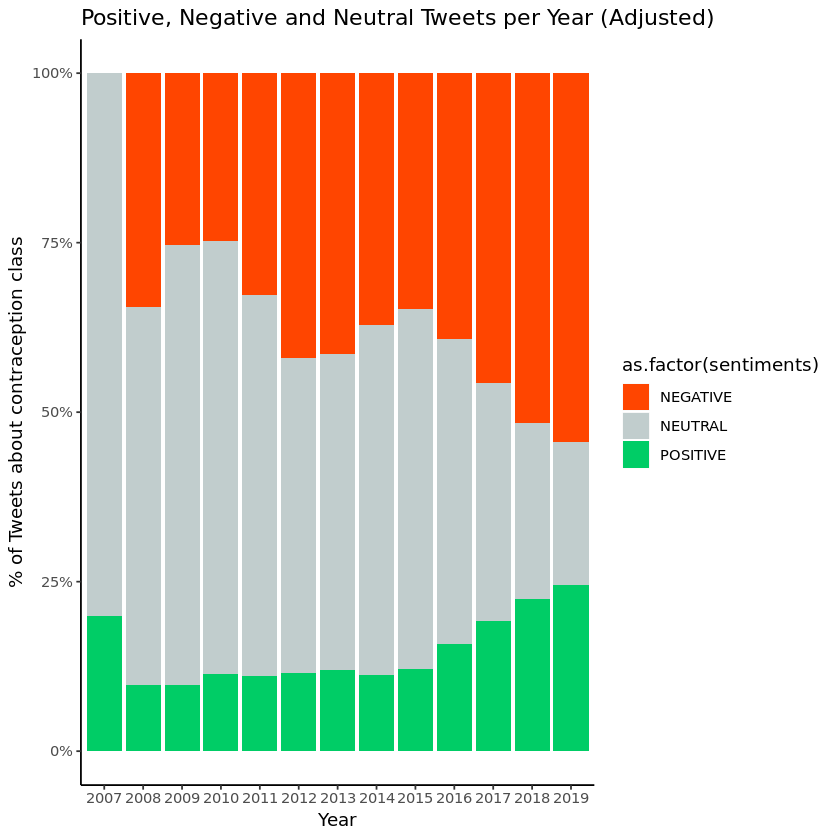

In [72]:
adjustedBarplot( input = selection, 
                 title = "Positive, Negative and Neutral Tweets per Year (Adjusted)" )

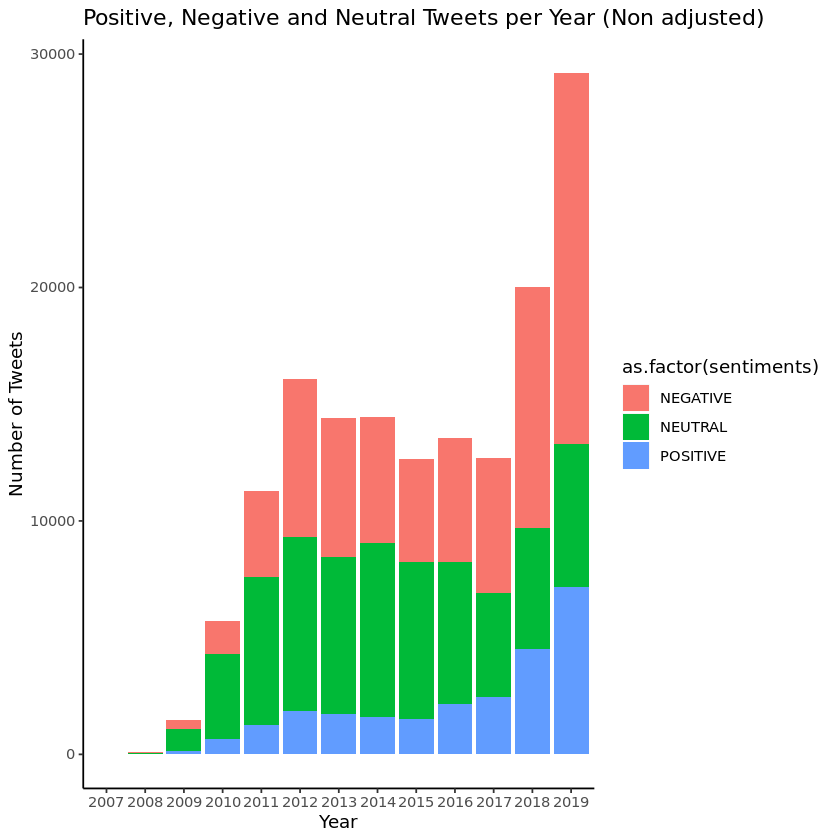

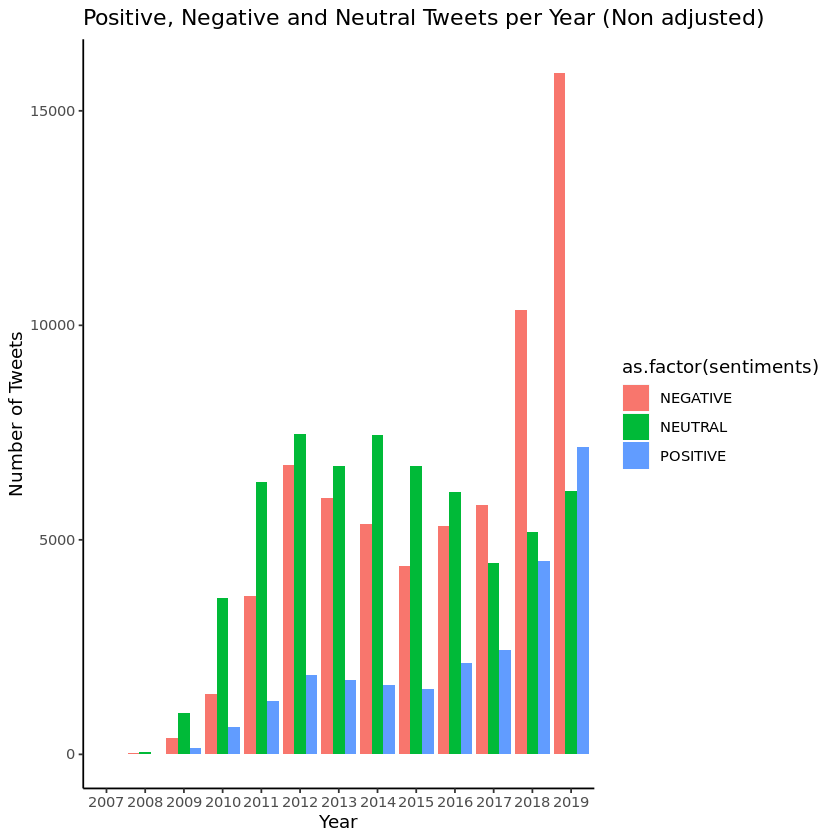

In [49]:
nonAdjustedBarplotStacked( input = selection, 
                    title = "Positive, Negative and Neutral Tweets per Year (Non adjusted)" )

nonAdjustedBarplot( input = selection, 
                    title = "Positive, Negative and Neutral Tweets per Year (Non adjusted)" )

## Number of positive, negative and neutral tweets about LARC methods (IUD, LNG-IUD, Copper IUD, Implant) per year

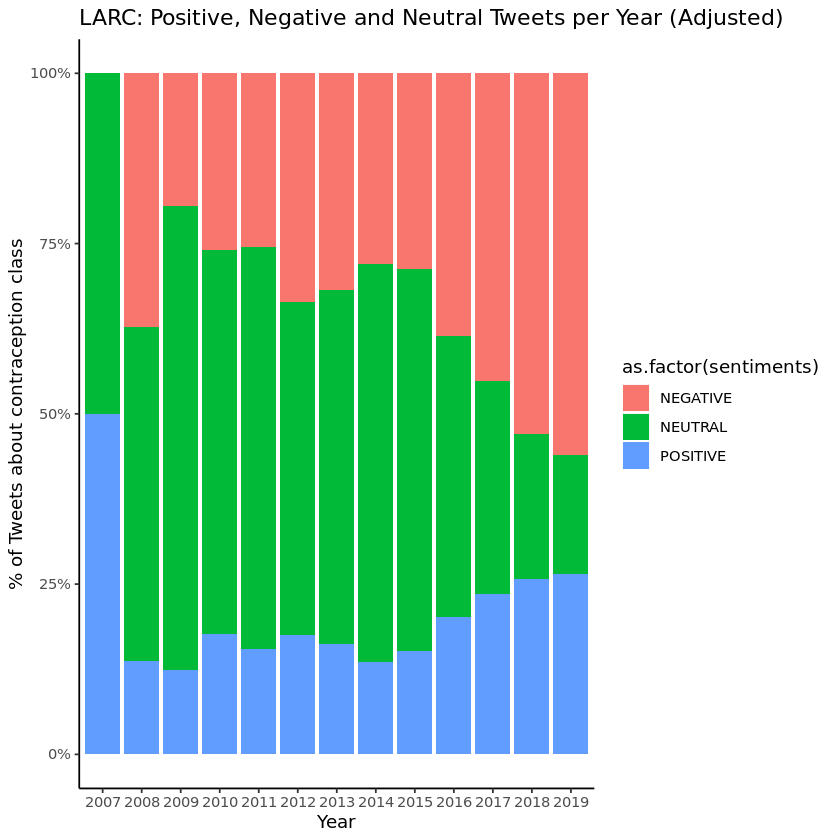

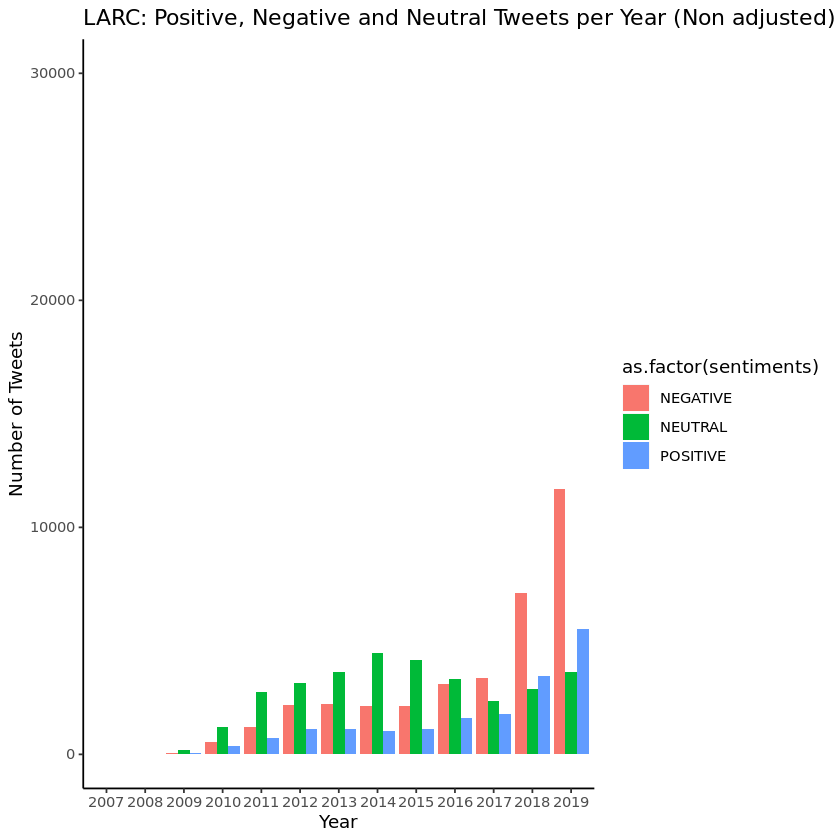

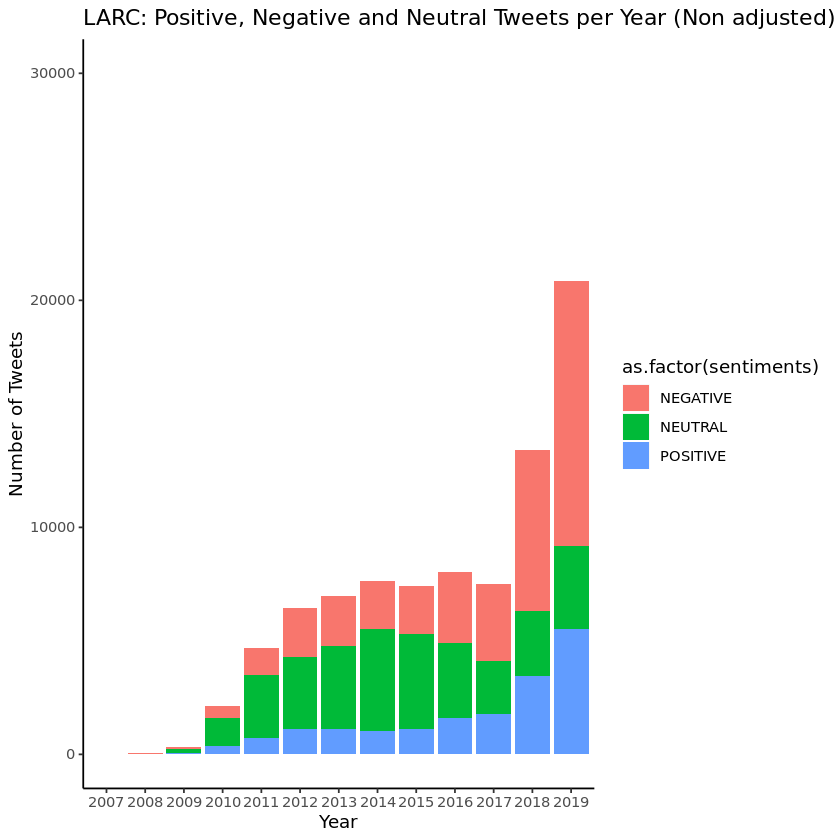

In [52]:
#LARC
selectionLarc <-  selection[ selection$category %in% c("IUD", "LNG-IUD", "copperIUD", "Implant"),]

adjustedBarplot( input = selectionLarc, 
                 title = "LARC: Positive, Negative and Neutral Tweets per Year (Adjusted)")

nonAdjustedBarplot2 ( input = selectionLarc, 
                   title = "LARC: Positive, Negative and Neutral Tweets per Year (Non adjusted)" )

nonAdjustedBarplot2Stacked ( input = selectionLarc, 
                   title = "LARC: Positive, Negative and Neutral Tweets per Year (Non adjusted)" )

## Number of positive, negative and neutral tweets about Non-LARC methods (Pill, Patch, Ring, Shot) per year

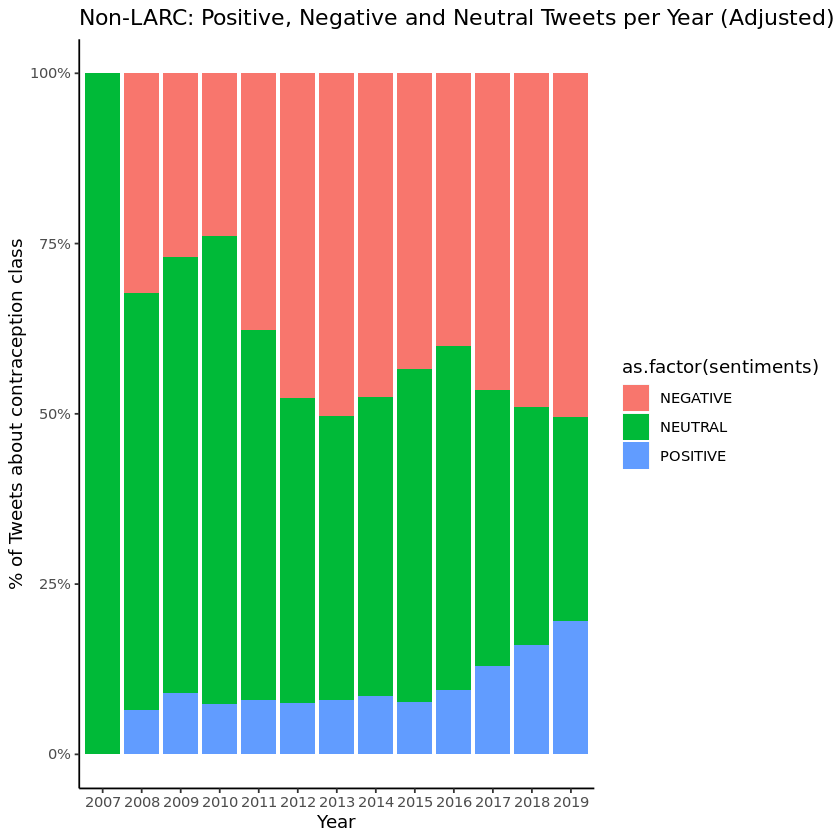

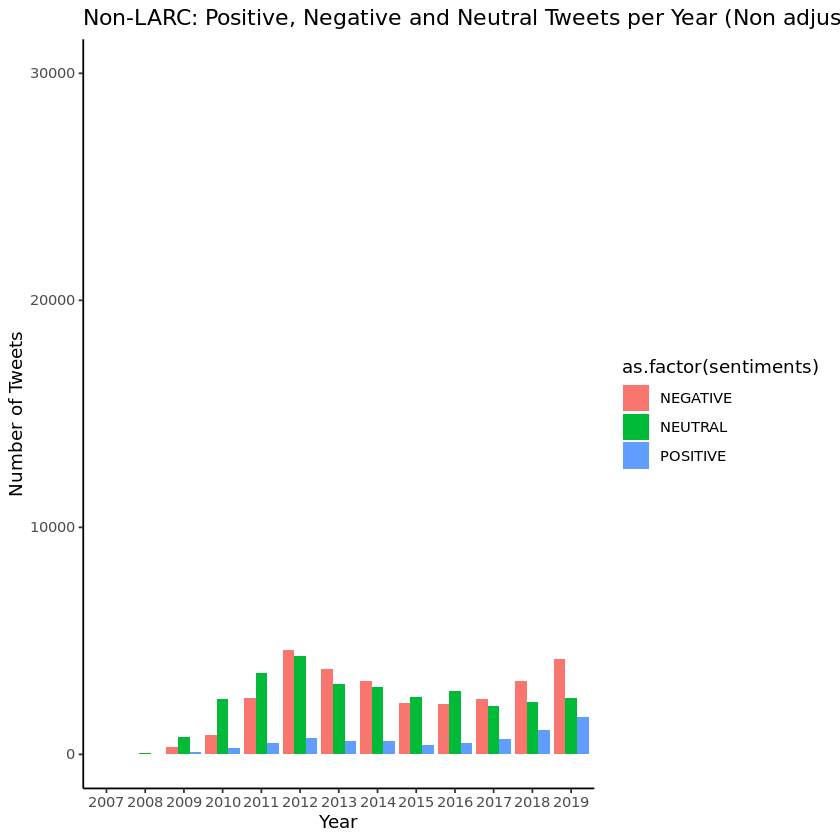

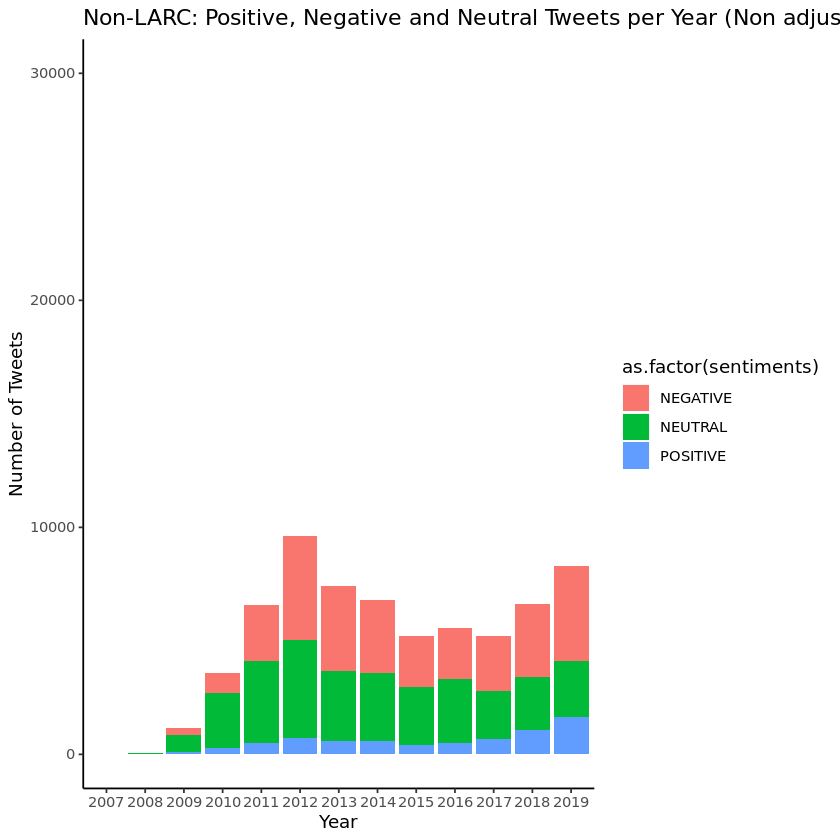

In [53]:
#Non-LARC
selectionNonLARC <-  selection[ selection$category %in% c("Pill", "Patch", "Ring", "Shot"),]

adjustedBarplot( input = selectionNonLARC, 
                 title = "Non-LARC: Positive, Negative and Neutral Tweets per Year (Adjusted)")

nonAdjustedBarplot2( input = selectionNonLARC, 
                   title = "Non-LARC: Positive, Negative and Neutral Tweets per Year (Non adjusted)" )

nonAdjustedBarplot2Stacked( input = selectionNonLARC, 
                   title = "Non-LARC: Positive, Negative and Neutral Tweets per Year (Non adjusted)" )

## Number of positive, negative and neutral tweets about each contraceptive class per year

### IUD

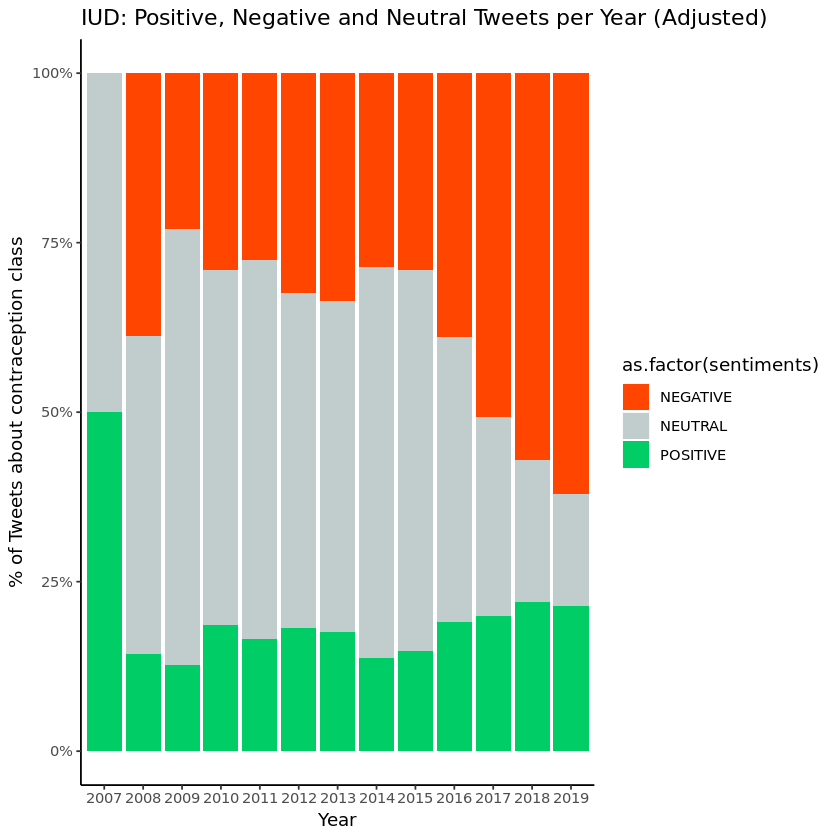

In [73]:
iud <-  selection[ selection$category == "IUD",]

adjustedBarplot( input = iud, 
                 title = "IUD: Positive, Negative and Neutral Tweets per Year (Adjusted)")

### LGN-IUD

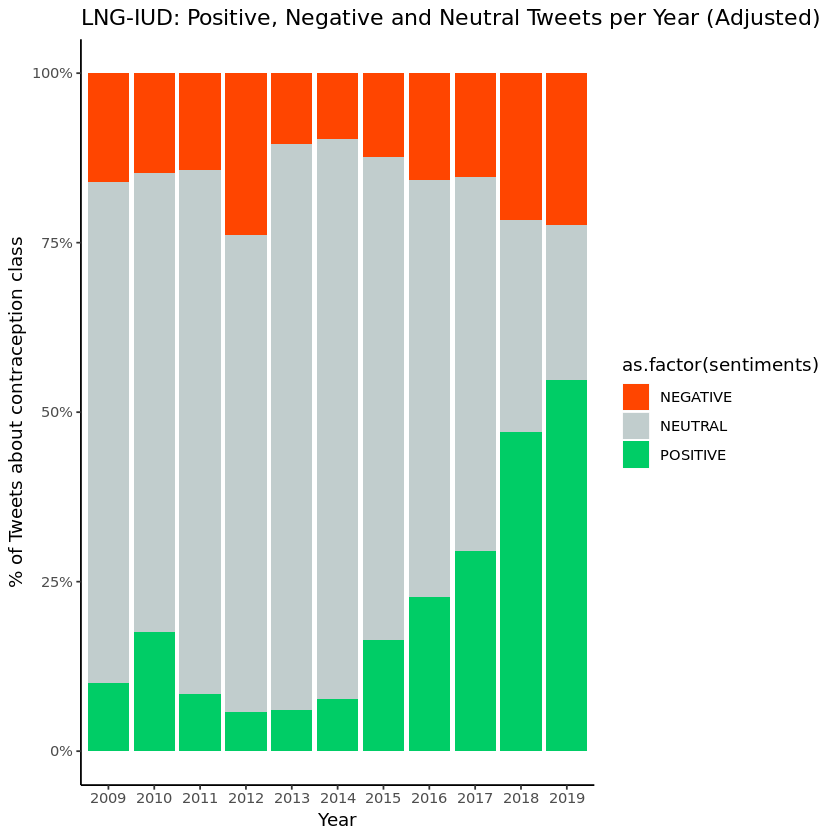

In [74]:
lng_iud <-  selection[ selection$category == "LNG-IUD",]

adjustedBarplot( input = lng_iud, 
                 title = "LNG-IUD: Positive, Negative and Neutral Tweets per Year (Adjusted)")

### Implant

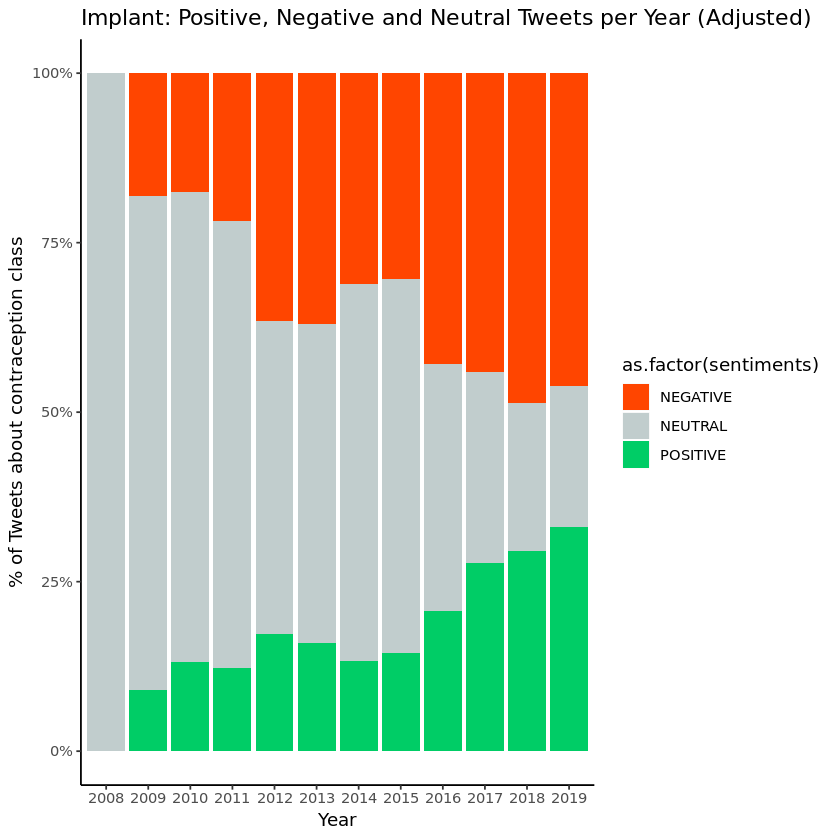

In [79]:
implant <-  selection[ selection$category == "Implant",]

adjustedBarplot( input = implant, 
                 title = "Implant: Positive, Negative and Neutral Tweets per Year (Adjusted)")

### Copper IUD

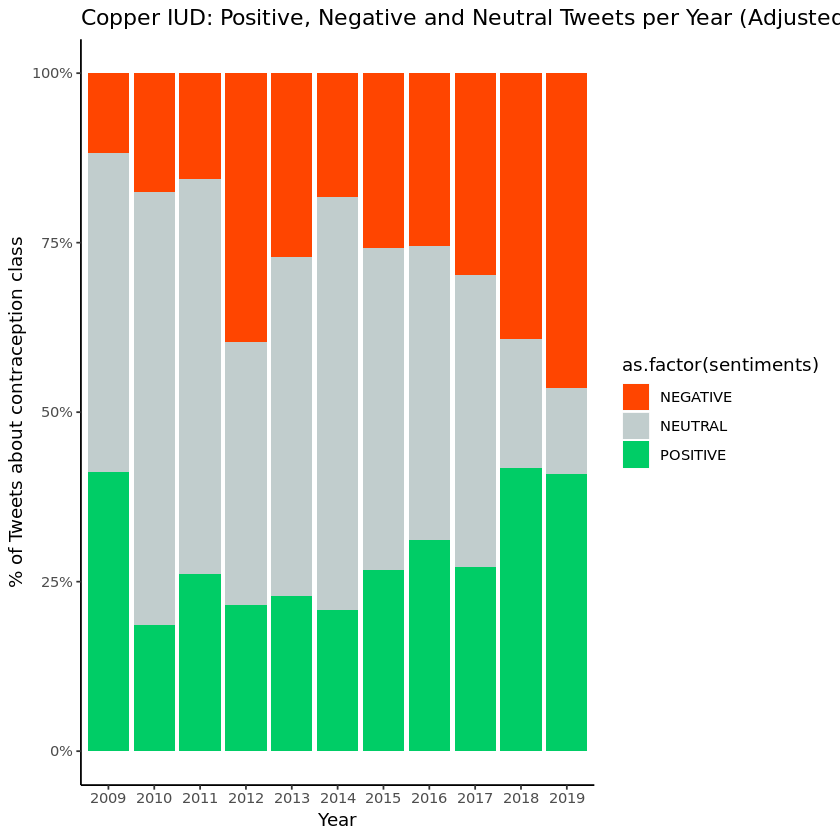

In [80]:
copperIUD <-  selection[ selection$category == "copperIUD",]

adjustedBarplot( input = copperIUD, 
                 title = "Copper IUD: Positive, Negative and Neutral Tweets per Year (Adjusted)")

### Patch

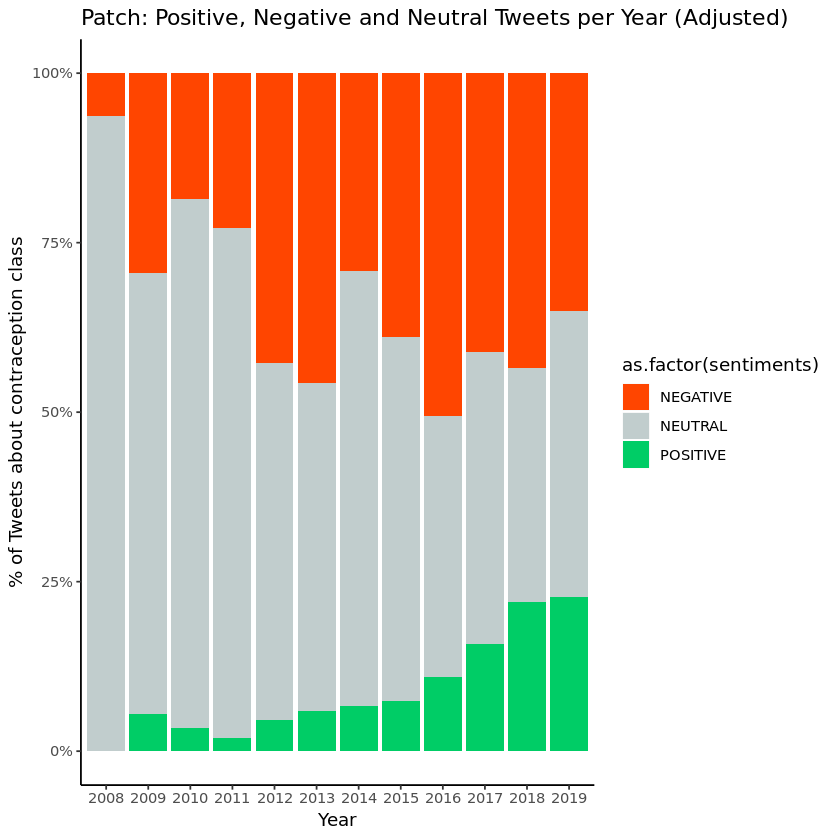

In [81]:
patch <-  selection[ selection$category == "Patch",]

adjustedBarplot( input = patch, 
                 title = "Patch: Positive, Negative and Neutral Tweets per Year (Adjusted)")

### Pill

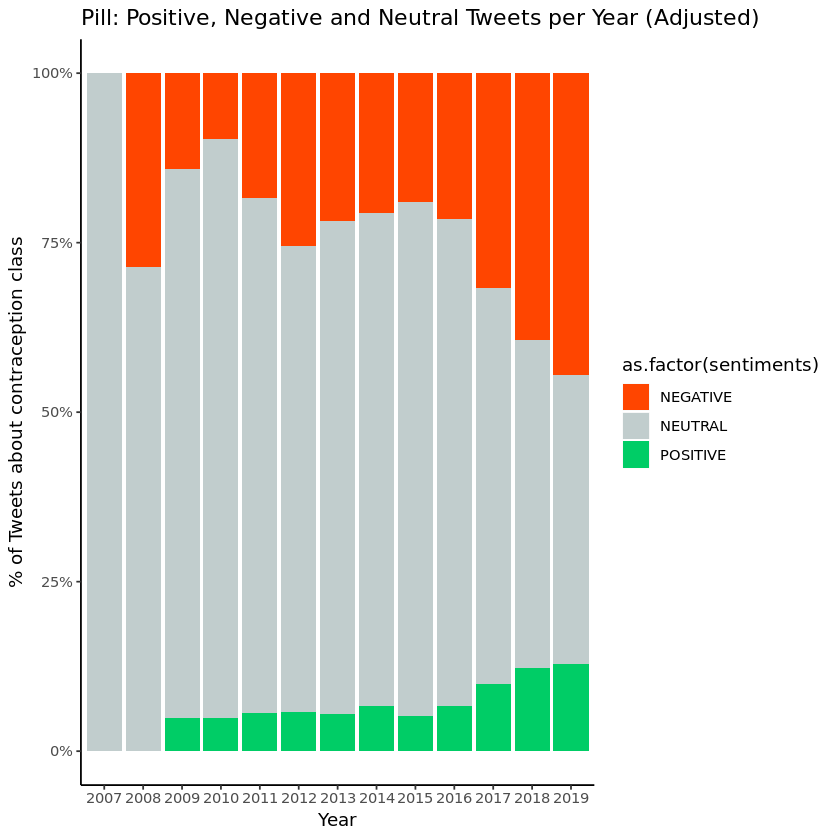

In [82]:
pill <-  selection[ selection$category == "Pill",]

adjustedBarplot( input = pill, 
                 title = "Pill: Positive, Negative and Neutral Tweets per Year (Adjusted)")

### Shot

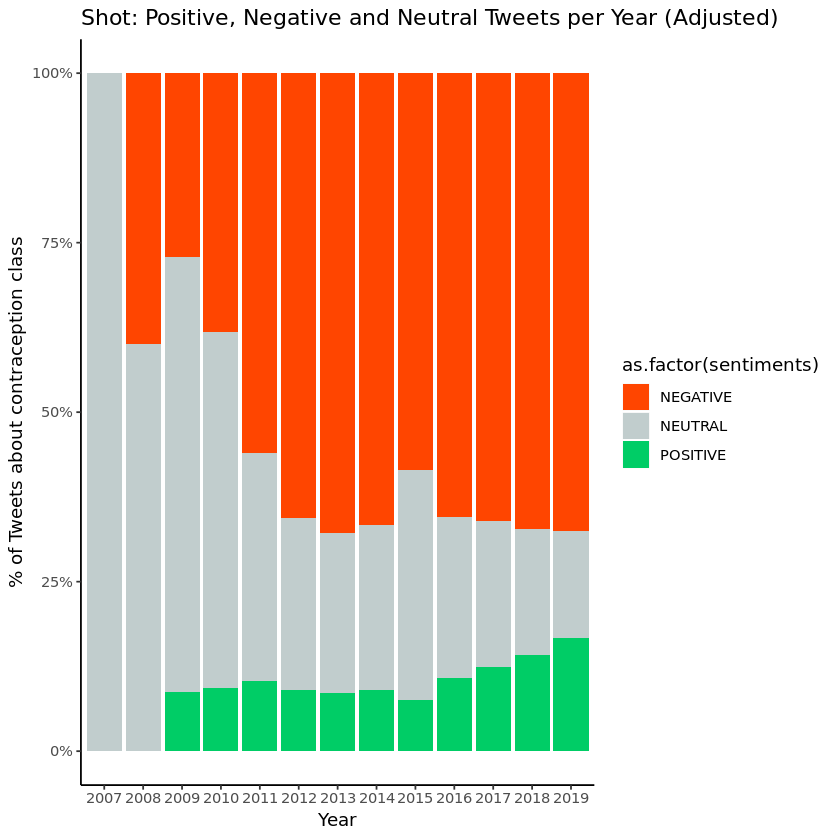

In [83]:
shot <-  selection[ selection$category == "Shot",]

adjustedBarplot( input = shot, 
                 title = "Shot: Positive, Negative and Neutral Tweets per Year (Adjusted)")

### Ring

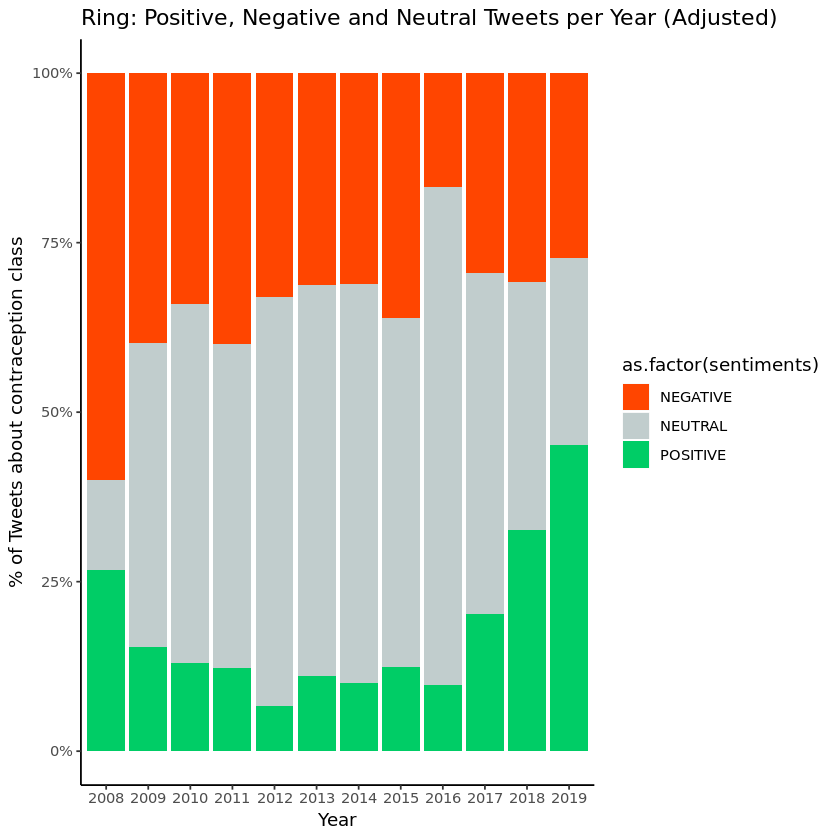

In [84]:
ring <-  selection[ selection$category == "Ring",]

adjustedBarplot( input = ring, 
                 title = "Ring: Positive, Negative and Neutral Tweets per Year (Adjusted)")

In [95]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Amazon Linux AMI 2018.03

Matrix products: default
BLAS/LAPACK: /home/ec2-user/anaconda3/envs/R/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gridExtra_2.3 dplyr_0.8.3   ggplot2_3.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3       magrittr_1.5     tidyselect_0.2.5 munsell_0.5.0   
 [5] uuid_0.1-2       colorspace_1.4-1 R6_2.4.1         rlang_0.4.2     
 [9] tools_3.6.1      grid_3.6.1       gtable_0.3.0     withr_2.1.2     
[13] htmltools_0.4.0  lazyeval_0.2.2   digest_0.6.23    assertthat_0.2.1
[17] tibble_2.1.3     crayon_1.3.4     IRdisplay_0.7.0  purrr_0.3.3     
[21] repr_0.19.2      base64enc_0.1-3  IRkernel_0.8.15  glue_1.3.1      
[25] evaluate_0.13    labeling_0.3     pbdZMQ_0.3-3     compiler_3.6.1  
[29] pillar_1.4.3     scales_1.0.0     j